In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

/var/folders/kf/4mbvx4jx6jl2h4j6258cj1vm0000gn/T/ipykernel_27852/2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# Path to your CSV file
file_path = '/Users/sampass/Desktop/IMC Trade Comp/Derivative Strat/Stuff/7967dd9e-ce25-4a3f-83f3-6436994e851a.csv'

# Load the CSV file
data = pd.read_csv(file_path, delimiter=';')

# Creating separate DataFrames for each tradable instrument: Amethysts and Starfruit
amethysts_data = data[data['product'] == 'AMETHYSTS'].copy()
starfruit_data = data[data['product'] == 'STARFRUIT'].copy()

# Setting the 'timestamp' column as the index and keeping only the required columns
amethysts_data.set_index('timestamp', inplace=True)
starfruit_data.set_index('timestamp', inplace=True)

amethysts_data = amethysts_data[['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price']]
starfruit_data = starfruit_data[['bid_price_1', 'bid_volume_1', 'bid_price_2', 'bid_volume_2', 'bid_price_3', 'bid_volume_3', 'ask_price_1', 'ask_volume_1', 'ask_price_2', 'ask_volume_2', 'ask_price_3', 'ask_volume_3', 'mid_price']]

starfruit_data.to_csv('starfruit.csv')
amethysts_data.to_csv('amethysts.csv')

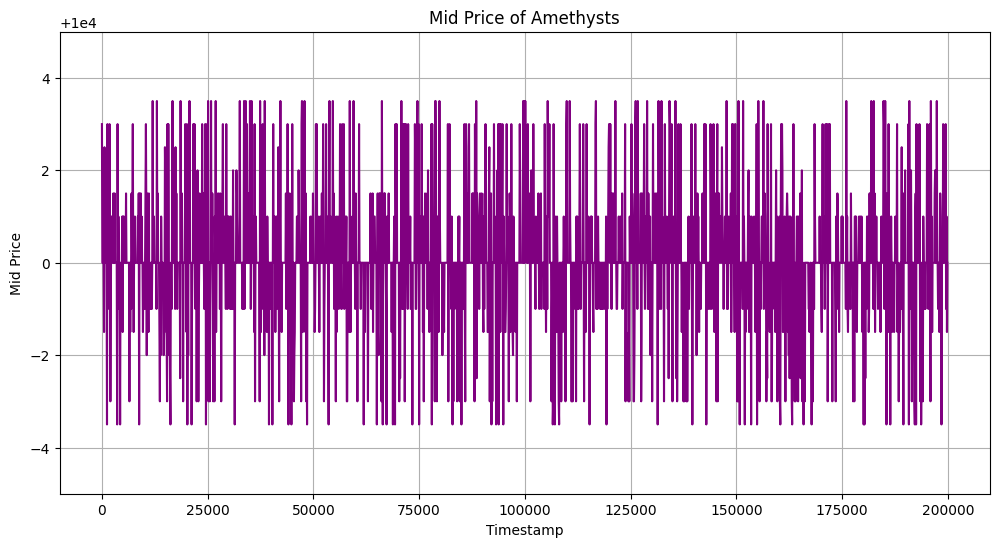

In [3]:
plt.figure(figsize=(12, 6))
plt.plot(amethysts_data.index, amethysts_data['mid_price'], color='purple')
plt.title('Mid Price of Amethysts')
plt.xlabel('Timestamp')
plt.ylabel('Mid Price')
plt.ylim(9995, 10005)  # Setting the y-axis limits to start at 0 and end a bit above the max value
plt.grid(True)
plt.show()

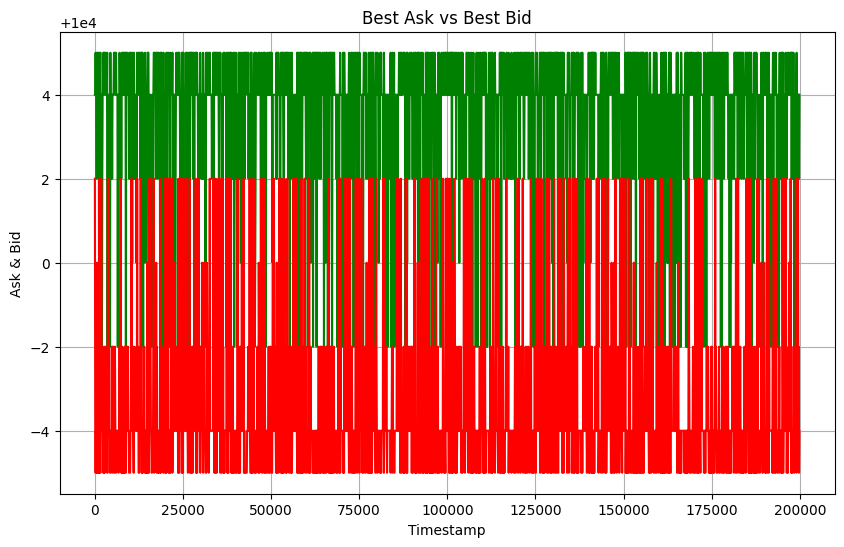

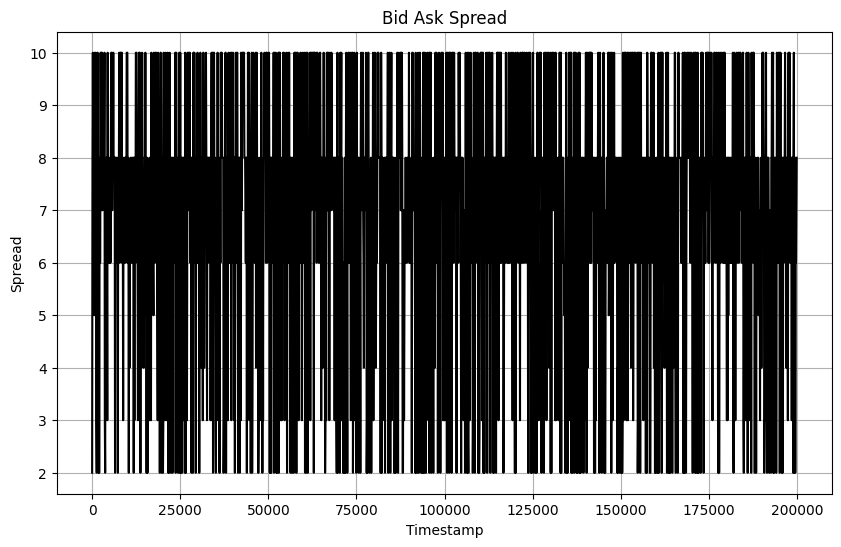

In [4]:
best_ask = amethysts_data['ask_price_1']
best_bid = amethysts_data['bid_price_1']
bid_ask_spread = best_ask - best_bid
plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, amethysts_data['ask_price_1'], color='green')
plt.plot(amethysts_data.index, amethysts_data['bid_price_1'], color='red')
plt.title('Best Ask vs Best Bid')
plt.xlabel('Timestamp')
plt.ylabel('Ask & Bid')
plt.grid(True)
plt.show()
plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, bid_ask_spread, color='black')
plt.title('Bid Ask Spread')
plt.xlabel('Timestamp')
plt.ylabel('Spreead')
plt.grid(True)
plt.show()

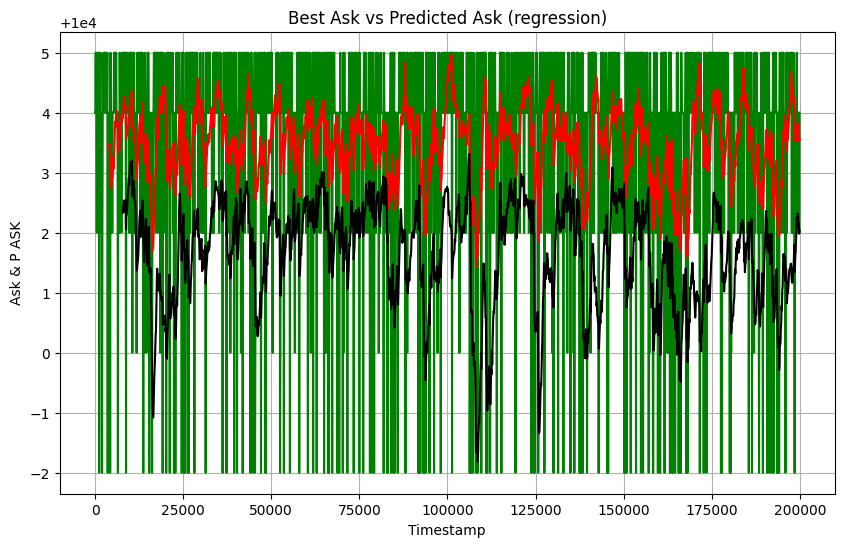

In [5]:
def linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    b = y_mean - m * X_mean
    return m, b

amethysts_data['m'] = np.nan
amethysts_data['b'] = np.nan
amethysts_data['predicted_best_ask'] = np.nan
for i in range(len(amethysts_data)):
        if i >= 40:
            X = amethysts_data.index[i-40:i+1]
            y = amethysts_data['ask_price_1'].iloc[i-40:i+1].values
            m, b = linear_regression(X, y)

            predicted_price = m * X[-1] + b

            amethysts_data.iloc[i, amethysts_data.columns.get_loc('m')] = m
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('b')] = b
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('predicted_best_ask')] = predicted_price
        else:
            # For the first 20 days, we don't perform regression
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('m')] = np.nan
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('b')] = np.nan
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('predicted_best_ask')] = np.nan

window_size = 40
amethysts_data['predicted_best_ask_rolling_std'] = amethysts_data['predicted_best_ask'].rolling(window=window_size).std()
amethysts_data['predicted_best_ask_lower_band'] = amethysts_data['predicted_best_ask'] - (amethysts_data['predicted_best_ask_rolling_std'] * 4.2)

plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, amethysts_data['ask_price_1'], color='green')
plt.plot(amethysts_data.index, amethysts_data['predicted_best_ask'], color='red')
plt.plot(amethysts_data.index, amethysts_data['predicted_best_ask_lower_band'], color='black')
plt.title('Best Ask vs Predicted Ask (regression)')
plt.xlabel('Timestamp')
plt.ylabel('Ask & P ASK')
plt.grid(True)
plt.show()

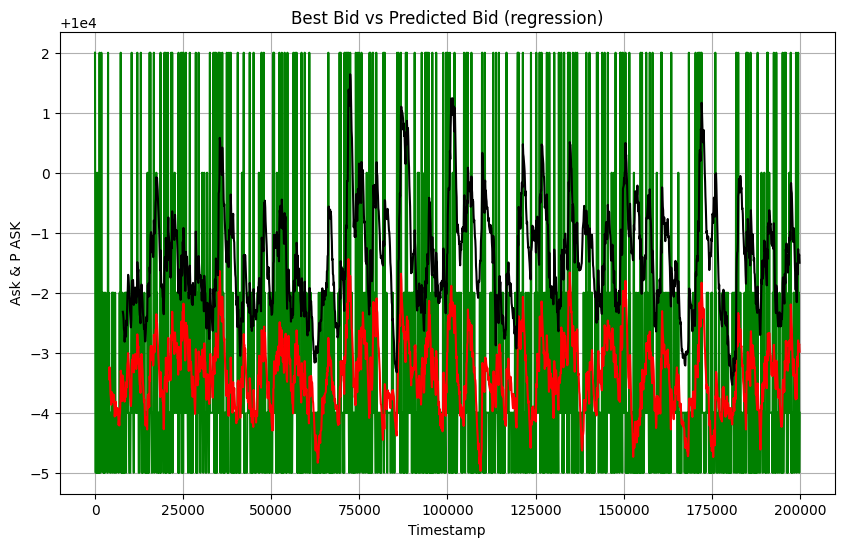

In [6]:
def linear_regression(X, y):
    X_mean = np.mean(X)
    y_mean = np.mean(y)
    m = np.sum((X - X_mean) * (y - y_mean)) / np.sum((X - X_mean)**2)
    b = y_mean - m * X_mean
    return m, b

amethysts_data['m'] = np.nan
amethysts_data['b'] = np.nan
amethysts_data['predicted_best_bid'] = np.nan
for i in range(len(amethysts_data)):
        if i >= 40:
            X = amethysts_data.index[i-40:i+1]
            y = amethysts_data['bid_price_1'].iloc[i-40:i+1].values
            m, b = linear_regression(X, y)

            predicted_price = m * X[-1] + b

            amethysts_data.iloc[i, amethysts_data.columns.get_loc('m')] = m
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('b')] = b
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('predicted_best_bid')] = predicted_price
        else:
            # For the first 20 days, we don't perform regression
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('m')] = np.nan
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('b')] = np.nan
            amethysts_data.iloc[i, amethysts_data.columns.get_loc('predicted_best_bid')] = np.nan

window_size = 40
amethysts_data['predicted_best_bid_rolling_std'] = amethysts_data['predicted_best_bid'].rolling(window=window_size).std()
amethysts_data['predicted_best_bid_upper_band'] = amethysts_data['predicted_best_bid'] + (amethysts_data['predicted_best_bid_rolling_std'] * 4.2)

plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, amethysts_data['bid_price_1'], color='green')
plt.plot(amethysts_data.index, amethysts_data['predicted_best_bid'], color='red')
plt.plot(amethysts_data.index, amethysts_data['predicted_best_bid_upper_band'], color='black')
plt.title('Best Bid vs Predicted Bid (regression)')
plt.xlabel('Timestamp')
plt.ylabel('Ask & P ASK')
plt.grid(True)
plt.show()

In [7]:
daily_returns = []
trade_log = []
position_open = False
position_type = None

for timestamp, row in amethysts_data.iloc[1:].iterrows():
    best_bid_price = row['bid_price_1']
    best_ask_price = row['ask_price_1']

    lower_band_value = row['predicted_best_ask_lower_band']
    upper_band_value = row['predicted_best_bid_upper_band']
    ask_mean = row['predicted_best_ask']
    bid_mean = row['predicted_best_bid']
    live_ask = row['ask_price_1']
    live_bid = row['bid_price_1']
    
    if live_ask < lower_band_value and not position_open:
        # Open long position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = True
        position_type = 'Long'

    elif live_bid > upper_band_value and not position_open:
        # Open short position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = True
        position_type = 'Short'
    
    elif live_bid > upper_band_value and position_open and position_type == 'Long':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = False
        
    elif live_ask < lower_band_value and position_open and position_type == 'Short':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = False

# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')

In [8]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []

i = 1
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and position_open is not None:
        i += 1
        close_position = trade
        close_position_dates.append(trade['Date'])
        if open_position['Type'] == 'Long':
            profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
        elif open_position['Type'] == 'Short':
            profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
        
        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print('Number of trades ', i)

Total return from strategy: 218.0
Number of trades  185


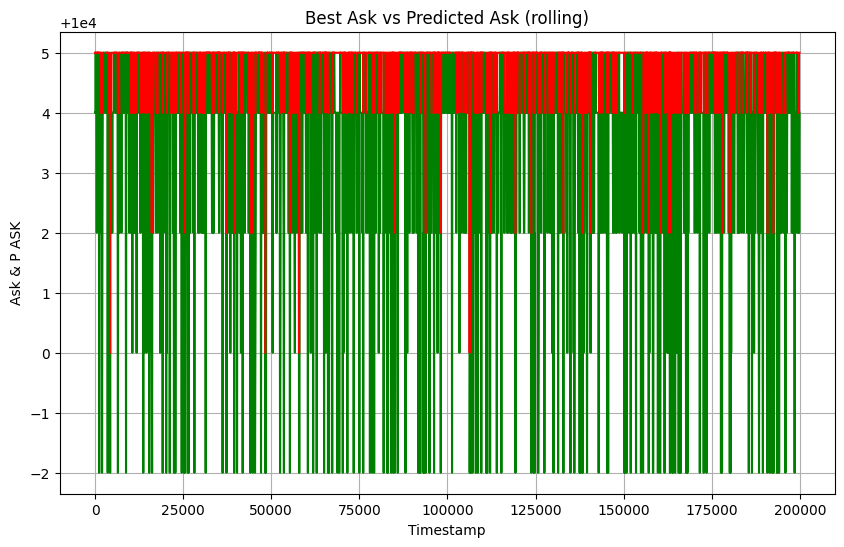

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, amethysts_data['ask_price_1'], color='green')
plt.plot(amethysts_data.index, amethysts_data['ask_price_2'], color='red')
plt.title('Best Ask vs Predicted Ask (rolling)')
plt.xlabel('Timestamp')
plt.ylabel('Ask & P ASK')
plt.grid(True)
plt.show()

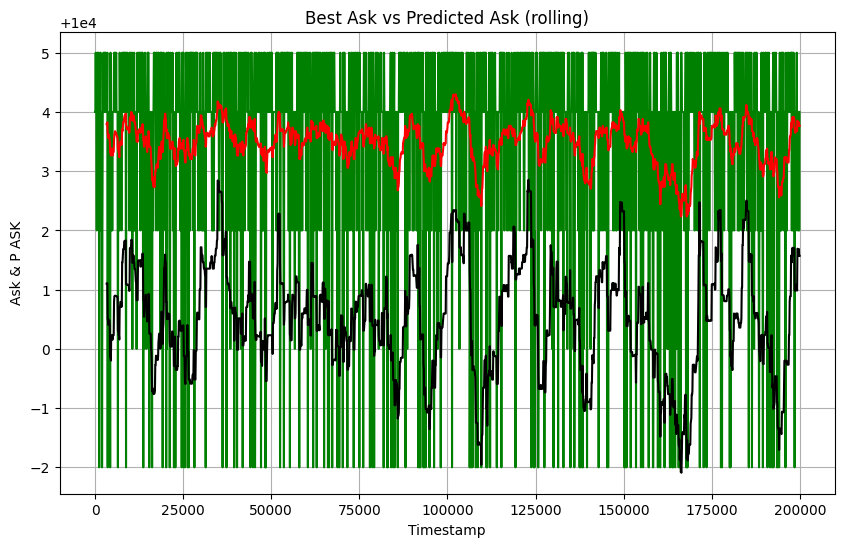

In [23]:
window_size = 34
amethysts_data['ask_price_1_rolling_mean'] = amethysts_data['ask_price_1'].rolling(window=window_size).mean()
amethysts_data['ask_price_1_rolling_std'] = amethysts_data['ask_price_1'].rolling(window=window_size).std()
amethysts_data['ask_price_1_lower_band'] = amethysts_data['ask_price_1_rolling_mean'] - (amethysts_data['ask_price_1_rolling_std'] * 1.6)

plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, amethysts_data['ask_price_1'], color='green')
plt.plot(amethysts_data.index, amethysts_data['ask_price_1_rolling_mean'], color='red')
plt.plot(amethysts_data.index, amethysts_data['ask_price_1_lower_band'], color='black')
plt.title('Best Ask vs Predicted Ask (rolling)')
plt.xlabel('Timestamp')
plt.ylabel('Ask & P ASK')
plt.grid(True)
plt.show()

timestamp
0                  NaN
100                NaN
200                NaN
300                NaN
400                NaN
              ...     
199500    10000.662345
199600    10000.595875
199700    10000.655294
199800    10000.662345
199900    10000.662345
Name: bid_price_1_upper_band, Length: 2000, dtype: float64


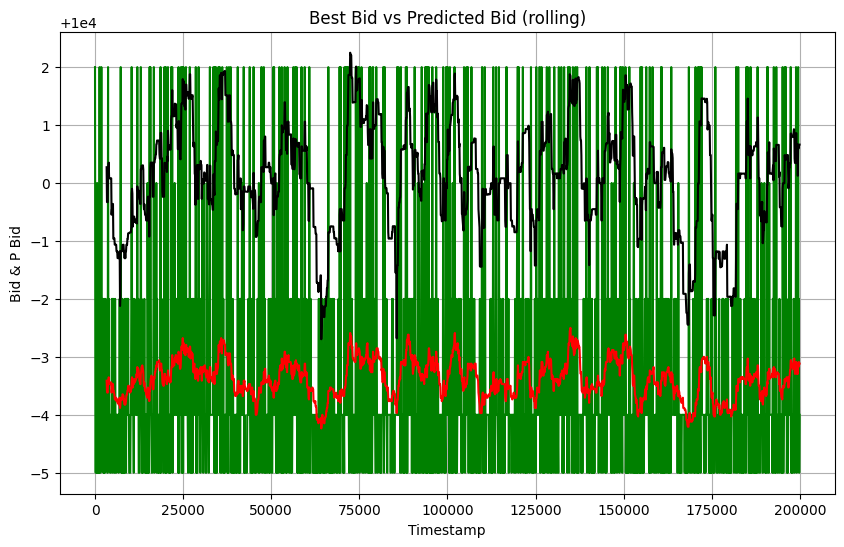

In [24]:
window_size = 34
amethysts_data['bid_price_1_rolling_mean'] = amethysts_data['bid_price_1'].rolling(window=window_size).mean()
amethysts_data['bid_price_1_rolling_std'] = amethysts_data['bid_price_1'].rolling(window=window_size).std()
amethysts_data['bid_price_1_upper_band'] = amethysts_data['bid_price_1_rolling_mean'] + (amethysts_data['bid_price_1_rolling_std'] * 1.8)
print(amethysts_data['bid_price_1_upper_band'])

plt.figure(figsize=(10, 6))
plt.plot(amethysts_data.index, amethysts_data['bid_price_1'], color='green')
plt.plot(amethysts_data.index, amethysts_data['bid_price_1_rolling_mean'], color='red')
plt.plot(amethysts_data.index, amethysts_data['bid_price_1_upper_band'], color='black')
plt.title('Best Bid vs Predicted Bid (rolling)')
plt.xlabel('Timestamp')
plt.ylabel('Bid & P Bid')
plt.grid(True)
plt.show()

In [25]:
daily_returns = []
trade_log = []
position_open = False
position_type = None

for timestamp, row in amethysts_data.iloc[1:].iterrows():
    best_bid_price = row['bid_price_1']
    best_ask_price = row['ask_price_1']

    lower_band_value = row['ask_price_1_lower_band']
    upper_band_value = row['bid_price_1_upper_band']
    ask_mean = row['ask_price_1_rolling_mean']
    bid_mean = row['bid_price_1_rolling_mean']
    live_ask = row['ask_price_1']
    live_bid = row['bid_price_1']
    
    if live_ask < lower_band_value and not position_open:
        # Open long position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = True
        position_type = 'Long'

    elif live_bid > upper_band_value and not position_open:
        # Open short position
        trade_log.append({
            'Date': timestamp,
            'Action': 'Open Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = True
        position_type = 'Short'
    
    elif live_bid > bid_mean and position_open and position_type == 'Long':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Long',
            'Shares': 1,
            'Price': best_bid_price,
        })
        position_open = False
        
    elif live_ask < ask_mean and position_open and position_type == 'Short':
        trade_log.append({
            'Date': timestamp,
            'Action': 'Close Position',
            'Type': 'Short',
            'Shares': 1,
            'Price': best_ask_price,
        })
        position_open = False

# Save the trade log to a DataFrame and then to a csv file
trade_log_df = pd.DataFrame(trade_log)
trade_log_df.to_csv('tradelog.csv')

In [26]:
total_return = 0
open_position = None
close_position_dates = []
close_position_returns = []

i = 1
for index, trade in trade_log_df.iterrows():
    if trade['Action'] == 'Open Position':
        open_position = trade
    elif trade['Action'] == 'Close Position' and position_open is not None:
        i += 1
        close_position = trade
        close_position_dates.append(trade['Date'])
        if open_position['Type'] == 'Long':
            profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
        elif open_position['Type'] == 'Short':
            profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
        
        total_return += profit_loss
        close_position_returns.append(profit_loss)

        open_position = None

profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
profit_loss_df.to_csv('returns.csv')

print(f"Total return from strategy: {total_return}")
print('Number of trades ', i)

Total return from strategy: 216.0
Number of trades  215


In [15]:
best_total_return = -float('inf')
best_window_size = None
best_upper_std_multiplier = None
best_lower_std_multiplier = None

for window_size in range(10, 41):
    for upper_std_multiplier in [x * 0.1 for x in range(10, 41)]:
        for lower_std_multiplier_adjustment in [-0.3, -0.2, -0.1, 0, 0.1, 0.2, 0.3]:
            lower_std_multiplier = upper_std_multiplier + lower_std_multiplier_adjustment
            amethysts_data['ask_price_1_rolling_mean'] = amethysts_data['ask_price_1'].rolling(window=window_size).mean()
            amethysts_data['ask_price_1_rolling_std'] = amethysts_data['ask_price_1'].rolling(window=window_size).std()
            amethysts_data['ask_price_1_lower_band'] = amethysts_data['ask_price_1_rolling_mean'] - (amethysts_data['ask_price_1_rolling_std'] * lower_std_multiplier)
            amethysts_data['bid_price_1_rolling_mean'] = amethysts_data['bid_price_1'].rolling(window=window_size).mean()
            amethysts_data['bid_price_1_rolling_std'] = amethysts_data['bid_price_1'].rolling(window=window_size).std()
            amethysts_data['bid_price_1_upper_band'] = amethysts_data['bid_price_1_rolling_mean'] + (amethysts_data['bid_price_1_rolling_std'] * upper_std_multiplier)
    
            # Calculate the total return for this iteration
            daily_returns = []
            trade_log = []
            position_open = False
            position_type = None
            
            for timestamp, row in amethysts_data.iloc[1:].iterrows():
                best_bid_price = row['bid_price_1']
                best_ask_price = row['ask_price_1']
            
                lower_band_value = row['ask_price_1_lower_band']
                upper_band_value = row['bid_price_1_upper_band']
                ask_mean = row['ask_price_1_rolling_mean']
                bid_mean = row['bid_price_1_rolling_mean']
                live_ask = row['ask_price_1']
                live_bid = row['bid_price_1']
                
                if live_ask < lower_band_value and not position_open:
                    # Open long position
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Open Position',
                        'Type': 'Long',
                        'Shares': 1,
                        'Price': best_ask_price,
                    })
                    position_open = True
                    position_type = 'Long'
            
                elif live_bid > upper_band_value and not position_open:
                    # Open short position
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Open Position',
                        'Type': 'Short',
                        'Shares': 1,
                        'Price': best_bid_price,
                    })
                    position_open = True
                    position_type = 'Short'
                
                elif live_bid > upper_band_value and position_open and position_type == 'Long':
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Close Position',
                        'Type': 'Long',
                        'Shares': 1,
                        'Price': best_bid_price,
                    })
                    position_open = False
                    
                elif live_ask < lower_band_value and position_open and position_type == 'Short':
                    trade_log.append({
                        'Date': timestamp,
                        'Action': 'Close Position',
                        'Type': 'Short',
                        'Shares': 1,
                        'Price': best_ask_price,
                    })
                    position_open = False
            
            # Save the trade log to a DataFrame and then to a csv file
            trade_log_df = pd.DataFrame(trade_log)
            trade_log_df.to_csv('tradelog.csv')
            total_return = 0
            open_position = None
            close_position_dates = []
            close_position_returns = []
            for index, trade in trade_log_df.iterrows():
                if trade['Action'] == 'Open Position':
                    open_position = trade
                elif trade['Action'] == 'Close Position' and position_open is not None:
                    close_position = trade
                    close_position_dates.append(trade['Date'])
                    if open_position['Type'] == 'Long':
                        profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
                    elif open_position['Type'] == 'Short':
                        profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
                    total_return += profit_loss
                    close_position_returns.append(profit_loss)
                    open_position = None
            profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
            profit_loss_df.to_csv('returns.csv')
    
            if total_return > best_total_return:
                best_total_return = total_return
                best_window_size = window_size
                best_upper_std_multiplier = upper_std_multiplier
                best_lower_std_multiplier = lower_std_multiplier

# After the loops
print(f"Best rolling window size: {best_window_size}, Best upper std multiplier: {best_upper_std_multiplier}, Best lower std multiplier: {best_lower_std_multiplier}, Best total return: {best_total_return}")

Best rolling window size: 34, Best upper std multiplier: 1.8, Best lower std multiplier: 1.6, Best total return: 446.0


In [28]:
best_total_return = -float('inf')
best_window_size = None
best_std_multiplier = None

for window_size in range(10, 41):
    for std_multiplier in [x * 0.1 for x in range(10, 41)]:
        # Recalculate Bollinger Bands with current window_size and std_multiplier
        amethysts_data['ask_price_1_rolling_mean'] = amethysts_data['ask_price_1'].rolling(window=window_size).mean()
        amethysts_data['ask_price_1_rolling_std'] = amethysts_data['ask_price_1'].rolling(window=window_size).std()
        amethysts_data['ask_price_1_lower_band'] = amethysts_data['ask_price_1_rolling_mean'] - (amethysts_data['ask_price_1_rolling_std'] * std_multiplier)
        amethysts_data['bid_price_1_rolling_mean'] = amethysts_data['bid_price_1'].rolling(window=window_size).mean()
        amethysts_data['bid_price_1_rolling_std'] = amethysts_data['bid_price_1'].rolling(window=window_size).std()
        amethysts_data['bid_price_1_upper_band'] = amethysts_data['bid_price_1_rolling_mean'] + (amethysts_data['bid_price_1_rolling_std'] * std_multiplier)

        # Calculate the total return for this iteration
        daily_returns = []
        trade_log = []
        position_open = False
        position_type = None
        
        for timestamp, row in amethysts_data.iloc[1:].iterrows():
            best_bid_price = row['bid_price_1']
            best_ask_price = row['ask_price_1']
        
            lower_band_value = row['ask_price_1_lower_band']
            upper_band_value = row['bid_price_1_upper_band']
            ask_mean = row['ask_price_1_rolling_mean']
            bid_mean = row['bid_price_1_rolling_mean']
            live_ask = row['ask_price_1']
            live_bid = row['bid_price_1']
            
            if live_ask < lower_band_value and not position_open:
                # Open long position
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Open Position',
                    'Type': 'Long',
                    'Shares': 1,
                    'Price': best_ask_price,
                })
                position_open = True
                position_type = 'Long'
        
            elif live_bid > upper_band_value and not position_open:
                # Open short position
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Open Position',
                    'Type': 'Short',
                    'Shares': 1,
                    'Price': best_bid_price,
                })
                position_open = True
                position_type = 'Short'
            
            elif live_bid > bid_mean and position_open and position_type == 'Long':
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Close Position',
                    'Type': 'Long',
                    'Shares': 1,
                    'Price': best_bid_price,
                })
                position_open = False
                
            elif live_ask < ask_mean and position_open and position_type == 'Short':
                trade_log.append({
                    'Date': timestamp,
                    'Action': 'Close Position',
                    'Type': 'Short',
                    'Shares': 1,
                    'Price': best_ask_price,
                })
                position_open = False
        
        # Save the trade log to a DataFrame and then to a csv file
        trade_log_df = pd.DataFrame(trade_log)
        trade_log_df.to_csv('tradelog.csv')
        total_return = 0
        open_position = None
        close_position_dates = []
        close_position_returns = []
        for index, trade in trade_log_df.iterrows():
            if trade['Action'] == 'Open Position':
                open_position = trade
            elif trade['Action'] == 'Close Position' and position_open is not None:
                close_position = trade
                close_position_dates.append(trade['Date'])
                if open_position['Type'] == 'Long':
                    profit_loss = (trade['Price'] - open_position['Price']) * open_position['Shares']
                elif open_position['Type'] == 'Short':
                    profit_loss = (open_position['Price'] - trade['Price']) * open_position['Shares']
                total_return += profit_loss
                close_position_returns.append(profit_loss)
                open_position = None
        profit_loss_df = pd.DataFrame(close_position_returns, index=close_position_dates, columns=['Profit/Loss'])
        profit_loss_df.to_csv('returns.csv')

        # Update the best parameters and return if current return is better
        if total_return > best_total_return:
            best_total_return = total_return
            best_window_size = window_size
            best_std_multiplier = std_multiplier

# After the loops
print(f"Best rolling window size: {best_window_size}, Best std multiplier: {best_std_multiplier}, Best total return: {best_total_return}")

Best rolling window size: 40, Best std multiplier: 2.0, Best total return: 256.0


In [15]:
profit_loss_df = pd.read_csv('returns.csv')

daily_returns = profit_loss_df['Profit/Loss'] / 5000

average_daily_return = daily_returns.mean()

annual_risk_free_rate = 0.02

daily_risk_free_rate = (1 + annual_risk_free_rate) ** (1/252) - 1

excess_daily_returns = daily_returns - daily_risk_free_rate

std_dev_excess_daily_returns = excess_daily_returns.std()

sharpe_ratio = (excess_daily_returns.mean() / std_dev_excess_daily_returns) * (252 ** 0.5)

print(f"Sharpe Ratio: {sharpe_ratio}")

Sharpe Ratio: 4.399390730920415


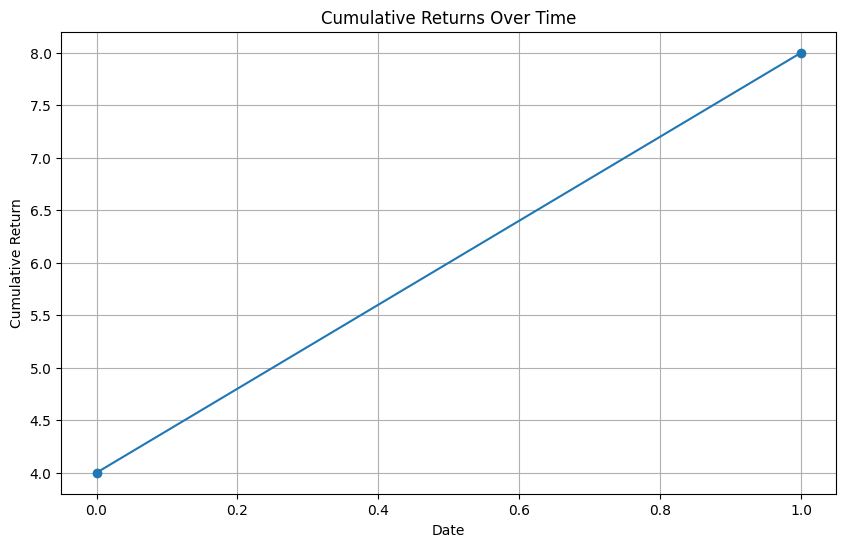

In [87]:
# Calculate cumulative returns
profit_loss_df['Cumulative Return'] = profit_loss_df['Profit/Loss'].cumsum()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(profit_loss_df['Cumulative Return'], marker='o')
plt.title('Cumulative Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

In [5]:
order_quantity = min(abs(-40), abs(-50), 19)
print(order_quantity)

19


In [6]:
print(-abs(order_quantity))

-19
